The following notebook is a data exploration notebook for LITS data set 
https://competitions.codalab.org/competitions/17094

*Labels*
- background - 0
- Liver - 1
- Liber lession - 2


#### Imports

In [1]:
import nibabel as nib
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np
import os

#### Functions

In [2]:
def display_slice_with_gt(slice_index, alpha=0.5):
    plt.figure(figsize=(6, 6))
    
    # Display the image slice
    plt.imshow(ct_image_data[:, :, slice_index], cmap="gray")
    
    # Overlay the GT slice with transparency
    plt.imshow(gt_image_data[:, :, slice_index], cmap="jet", alpha=alpha)  # 'jet' colormap for GT
    
    plt.title(f"Slice {slice_index + 1} of {num_slices}")
    plt.axis('off')  # Turn off axis labels
    plt.show()

def show_liver_segmentation_npy(gt_dir, images_dir, file_suffix):
    # collect all relevant slices
    img_files = [os.path.join(images_dir,file) for file in os.listdir(images_dir) if file_suffix in file and file.endswith('.npy')]
    gt_files = [os.path.join(gt_dir,file) for file in os.listdir(gt_dir) if file_suffix in file and file.endswith('.npy')]
    for i, (img_path,gt_path) in enumerate(zip(img_files,gt_files)):
        npy_img = np.load(img_path)
        npy_gt = np.load(gt_path)
        plt.imshow(npy_img, cmap='gray')
        plt.imshow(npy_gt, cmap='Reds', alpha=0.5)
        plt.title(f"Slice {i+1} of {len(img_files)}")
        plt.show()

#### Inputs

In [3]:
# nii files display
idx = 0
gt_path = fr'C:\Users\97254\Desktop\Resources\TAU\dl_medical_imaging\project\datasets\LITS\ct\Training_Batch_1\labels\segmentation-{idx}.nii'
ct_path = fr'C:\Users\97254\Desktop\Resources\TAU\dl_medical_imaging\project\datasets\LITS\ct\Training_Batch_1\images\volume-{idx}.nii'

In [4]:
gt_img = nib.load(gt_path)
ct_img = nib.load(ct_path)

In [5]:
gt_image_data = gt_img.get_fdata()
ct_image_data = ct_img.get_fdata()

In [6]:
num_slices = ct_image_data.shape[2]

In [7]:
slice_slider = widgets.IntSlider(min=0, max=num_slices-1, step=1, description="Slice")
alpha_slider = widgets.FloatSlider(min=0.0, max=1.0, step=0.1, value=0.5, description="Alpha")

In [8]:
widgets.interact(display_slice_with_gt, slice_index=slice_slider, alpha=alpha_slider)

interactive(children=(IntSlider(value=0, description='Slice', max=74), FloatSlider(value=0.5, description='Alp…

<function __main__.display_slice_with_gt(slice_index, alpha=0.5)>

In [9]:
# pre processing conversion of nii to npy
gt_dir = r'C:\Users\97254\Desktop\Resources\TAU\dl_medical_imaging\project\datasets\LITS\ct\Training_Batch_1\npy\CT_liver_train\gts'
images_dir = r'C:\Users\97254\Desktop\Resources\TAU\dl_medical_imaging\project\datasets\LITS\ct\Training_Batch_1\npy\CT_liver_train\imgs'
file_suffix = 'CT_liver_train_segmentation-0'

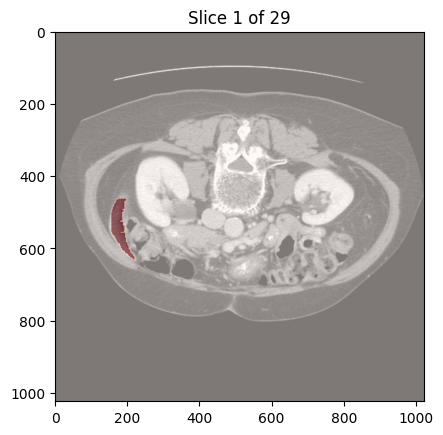

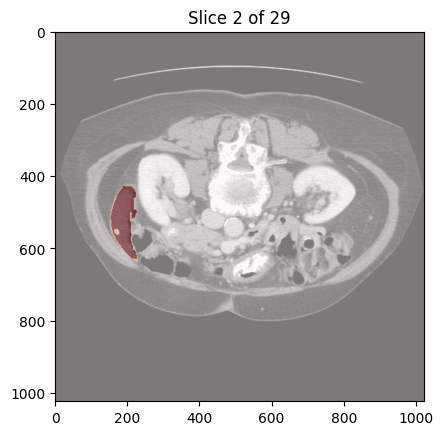

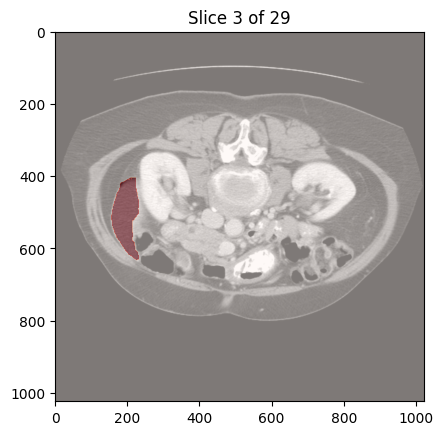

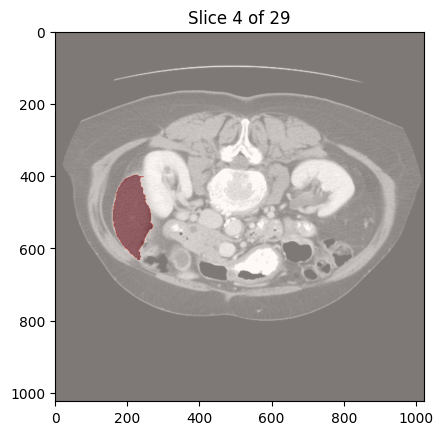

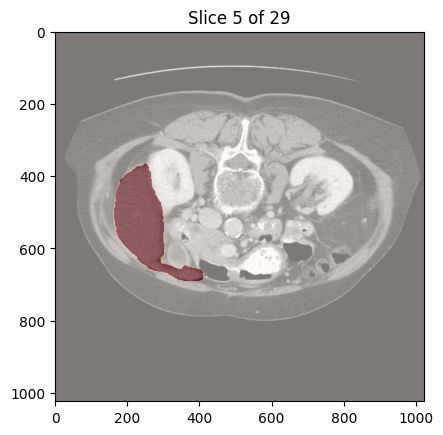

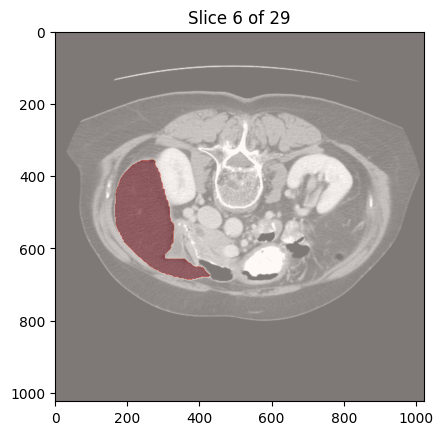

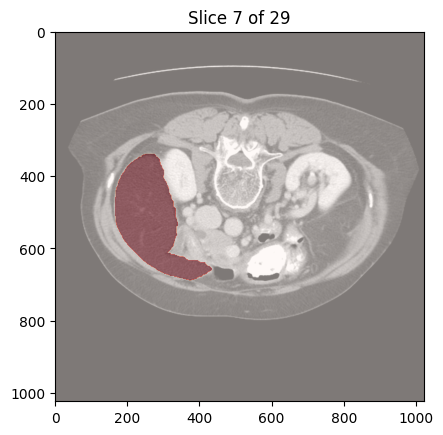

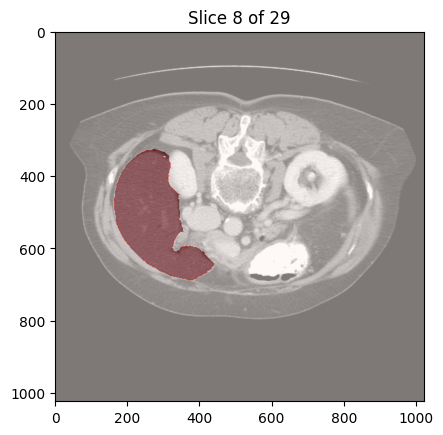

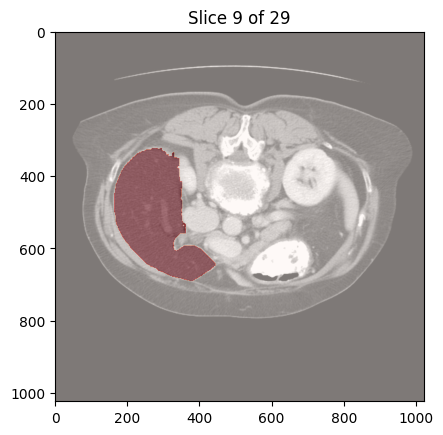

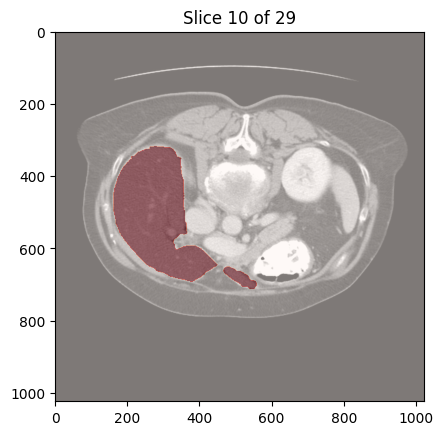

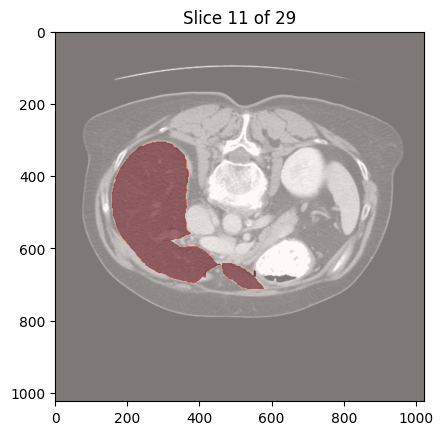

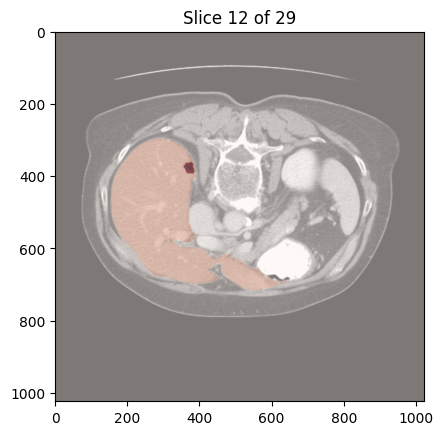

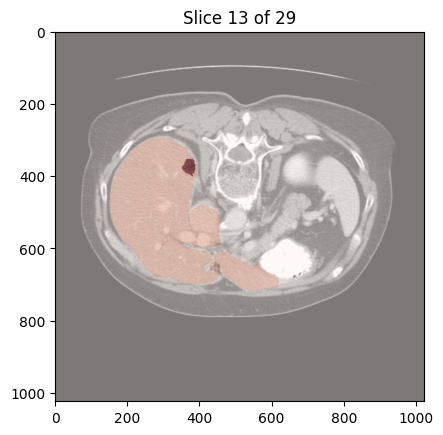

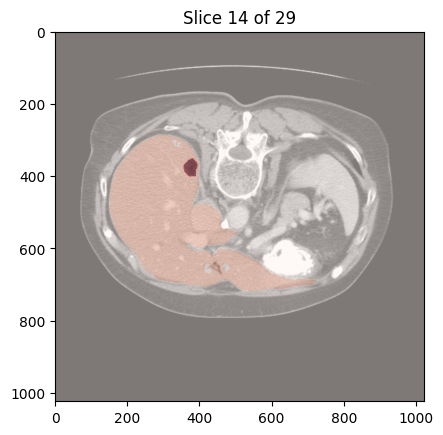

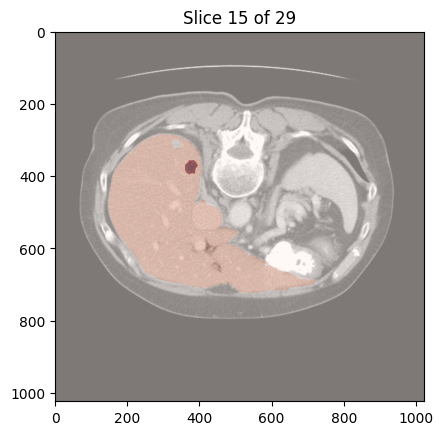

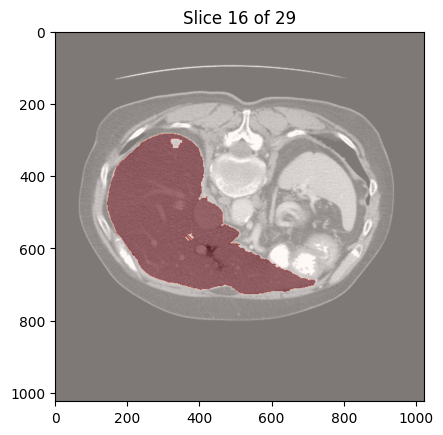

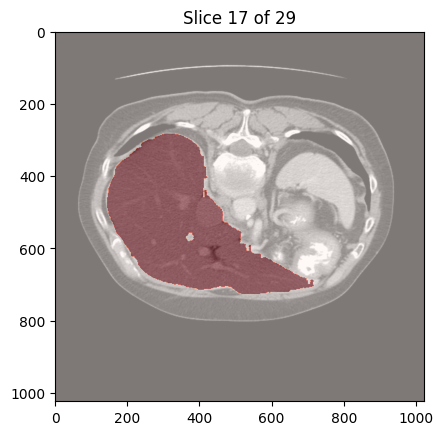

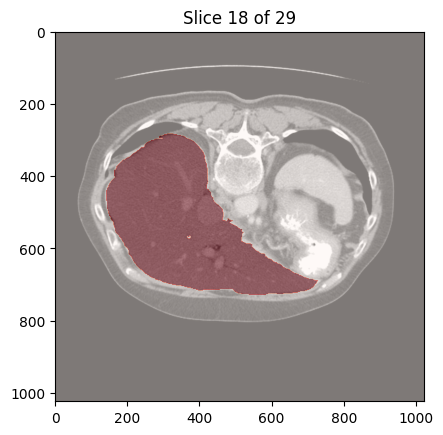

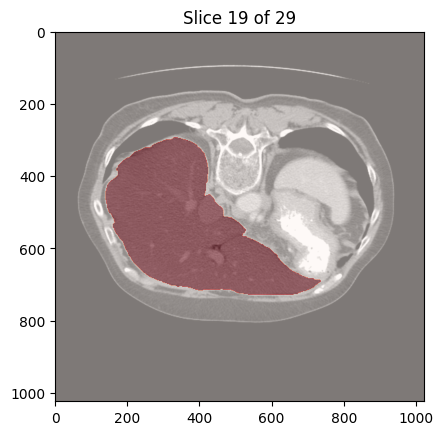

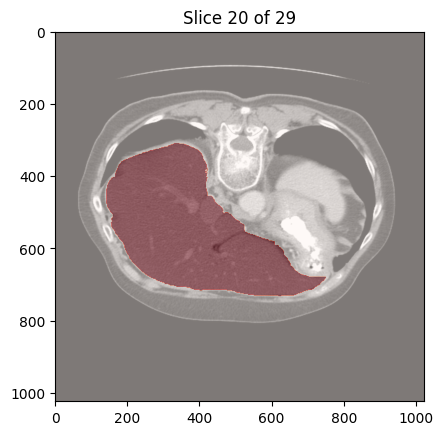

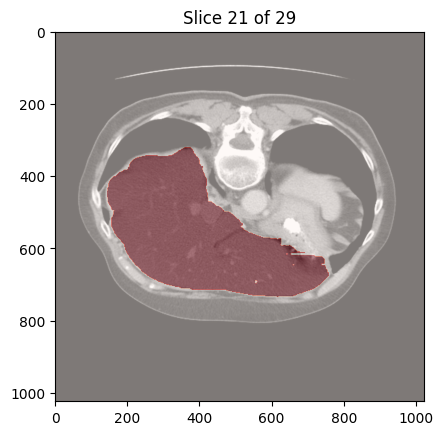

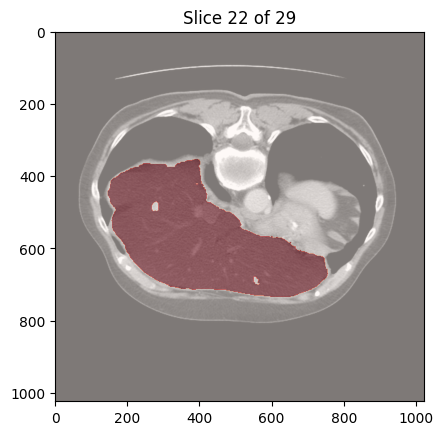

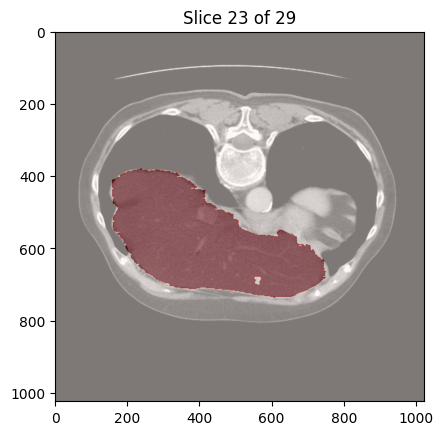

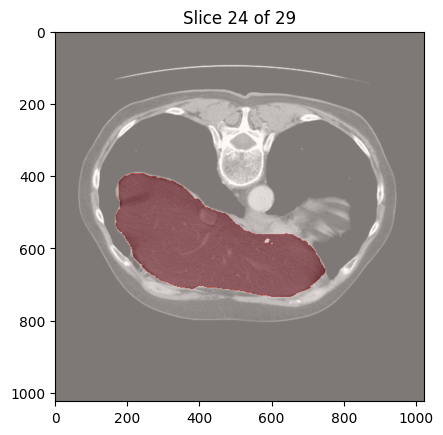

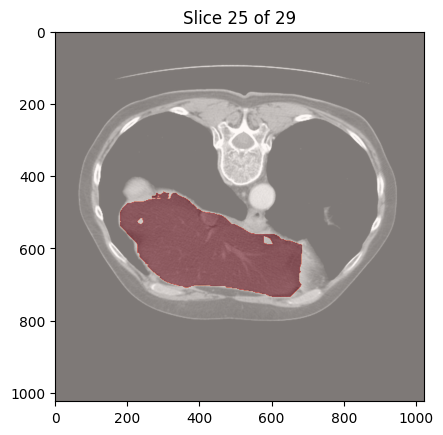

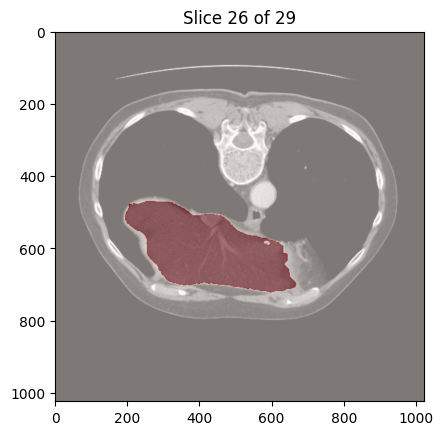

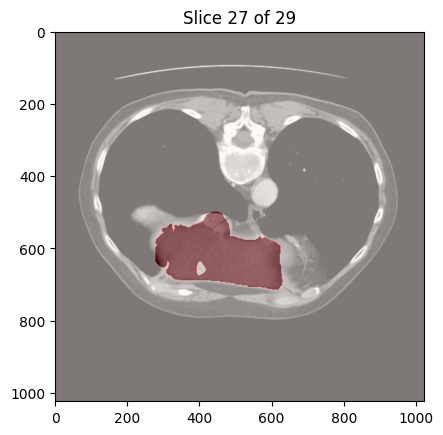

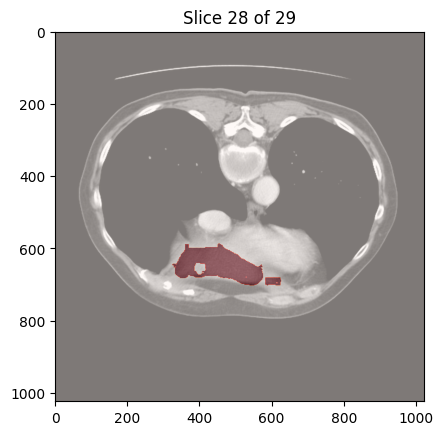

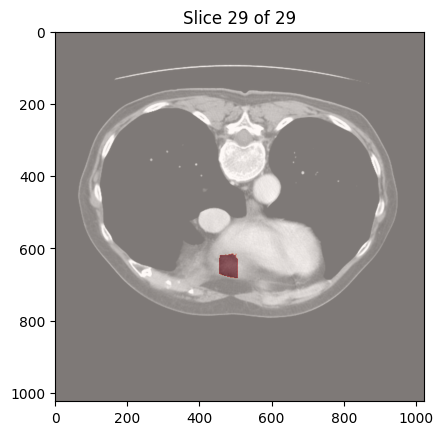

In [10]:
show_liver_segmentation_npy(gt_dir, images_dir, file_suffix)